### Lab 5: Autodificadores
1. Javier Mombiela: 20067
2. Pablo Gonzalez: 20362
   

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from keras.models import Sequential
from tensorflow.keras.models import Model

In [164]:
data = pd.read_csv('UK_foods.csv',index_col=0)
data = data.T
nombres_filas = data.index

### Visualización de datos

In [165]:
data

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [166]:
data.describe()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
count,4.000000,4.00,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,94.250000,245.25,706.000000,130.500000,205.250000,154.25000,798.250000,208.000000,457.750000,202.000000,349.000000,967.500000,1502.500000,57.500000,1427.000000,360.750000,55.250000
std,18.856917,16.50,93.427334,29.557853,22.366269,15.47848,200.755863,60.188592,92.471167,13.735599,15.769168,210.612599,54.659552,11.120552,140.612944,156.712848,10.436315
min,66.000000,227.00,586.000000,93.000000,184.000000,139.00000,566.000000,143.000000,355.000000,187.000000,334.000000,674.000000,1462.000000,47.000000,1256.000000,135.000000,41.000000
25%,93.750000,238.25,660.250000,114.750000,190.750000,145.00000,681.500000,164.000000,402.250000,195.250000,336.250000,886.250000,1469.500000,51.500000,1344.500000,315.000000,50.750000
50%,103.000000,243.50,717.500000,134.500000,201.000000,151.50000,797.000000,212.000000,453.000000,200.500000,348.500000,1029.500000,1483.000000,55.000000,1440.000000,416.500000,58.000000
75%,103.500000,250.50,763.250000,150.250000,215.500000,160.75000,913.750000,256.000000,508.500000,207.250000,361.250000,1110.750000,1516.000000,61.000000,1522.500000,462.250000,62.500000
max,105.000000,267.00,803.000000,160.000000,235.000000,175.00000,1033.000000,265.000000,570.000000,220.000000,365.000000,1137.000000,1582.000000,73.000000,1572.000000,475.000000,64.000000


In [167]:
data.shape

(4, 17)

### Normalización de datos

In [168]:
scaler = StandardScaler()
data = scaler.fit_transform(data)


In [169]:
data

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

In [176]:
autoencoder = Sequential([
    # Encoder
    Dense(8, activation='relu', input_shape=(17,)),
    Dense(6, activation='relu'),
    Dense(2, activation='relu'),  # Bottleneck layer with 2 neurons
    
    # Decoder
    Dense(4, activation='relu'),
    Dense(6, activation='relu'),
    Dense(8, activation='relu'),
    Dense(17, activation='linear')  # Output shape is 17 to reconstruct the original data
])
# Extraer el encoder


In [177]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(data, data, epochs=800)

Epoch 1/800
1/1 [==============================] - 1s 1s/step - loss: 1.0118
Epoch 2/800
1/1 [==============================] - 0s 4ms/step - loss: 1.0105
Epoch 3/800
1/1 [==============================] - 0s 4ms/step - loss: 1.0092
Epoch 4/800
1/1 [==============================] - 0s 4ms/step - loss: 1.0080
Epoch 5/800
1/1 [==============================] - 0s 8ms/step - loss: 1.0069
Epoch 6/800
1/1 [==============================] - 0s 4ms/step - loss: 1.0058
Epoch 7/800
1/1 [==============================] - 0s 4ms/step - loss: 1.0048
Epoch 8/800
1/1 [==============================] - 0s 4ms/step - loss: 1.0038
Epoch 9/800
1/1 [==============================] - 0s 4ms/step - loss: 1.0029
Epoch 10/800
1/1 [==============================] - 0s 4ms/step - loss: 1.0020
Epoch 11/800
1/1 [==============================] - 0s 4ms/step - loss: 1.0012
Epoch 12/800
1/1 [==============================] - 0s 4ms/step - loss: 1.0004
Epoch 13/800
1/1 [==============================] - 0s 4ms/ste

In [182]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)  # 2nd layer is the bottleneck layer
# Obtener la representación latente de 2 dimensiones
resultados = encoder.predict(data)

1/1 [==============================] - 0s 76ms/step


### Resultados

In [183]:
resultados

array([[ 0.        ,  0.02887003],
       [ 0.9576324 ,  0.        ],
       [ 0.37957785,  5.9699183 ],
       [11.751677  ,  0.        ]], dtype=float32)

### Shape del resultado

In [184]:
resultados.shape

(4, 2)

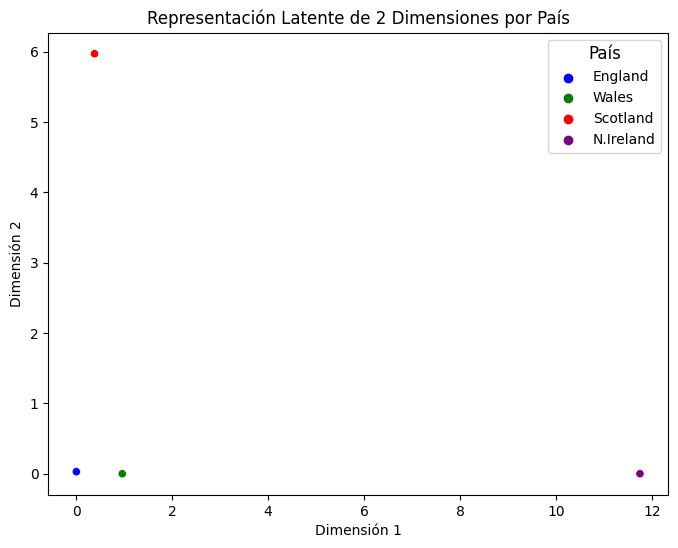

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que resultados contiene los datos 2D y nombres_filas los nombres de los países
df = pd.DataFrame({'Dimensión 1': resultados[:, 0],
                   'Dimensión 2': resultados[:, 1],
                   'País': nombres_filas})

# Asignar colores a cada país
# Define un diccionario de colores para asignar un color único a cada país
# Asegúrate de que los nombres de los países en el diccionario coincidan con los de tu conjunto de datos
country_colors = {
    'England': 'blue',
    'Wales': 'green',
    'Scotland': 'red',
    'N.Ireland': 'purple',
    # Agrega más países y colores según sea necesario
}

# Mapea los colores a los países en el DataFrame
df['Color'] = df['País'].map(country_colors)

# Crea un scatter plot con colores por país
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(data=df, x='Dimensión 1', y='Dimensión 2', hue='País', palette=country_colors.values())
plt.title('Representación Latente de 2 Dimensiones por País')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

# Personaliza la leyenda para mostrar los nombres de los países
legend = plt.legend(title='País', loc='best')
legend.set_title('País', prop={'size': 12})  # Cambia el tamaño del título de la leyenda
plt.show()


### Discusión y percepciones nuevas "Insights"

#### Analisis de dimensiones

Dimensión 1: La dimensión 1 tiene una alta contribución de "Carcass_meat" y "Fresh_fruit" de England, lo que sugiere que esta dimensión podría estar relacionada con el consumo de carne y frutas en England. Por otro lado, tiene una alta contribución de "Fresh_potatoes" en N.Ireland, lo que podría indicar una diferencia en el consumo de papas en N.Ireland en comparación con England.

Dimensión 2: La dimensión 2 tiene una alta contribución de "Other_meat" en Scotland, lo que sugiere que esta dimensión podría estar relacionada con el consumo de otras carnes en Scotland. También tiene una alta contribución de "Soft_drinks" en N.Ireland, lo que podría indicar una diferencia en el consumo de bebidas gaseosas en N.Ireland en comparación con Scotland.

#### Discusión

La representación latente que muestra Inglaterra y Gales cercanos entre sí y Escocia y Northern Ireland separados de los demás puntos podría estar reflejando una serie de factores complejos en los patrones de consumo de alimentos en el Reino Unido.

Inglaterra y Gales: La proximidad de Inglaterra y Gales en la representación latente podría deberse a una serie de razones. Estas dos regiones comparten una frontera geográfica y tienen una historia de influencia cultural compartida. Además, debido a su proximidad geográfica, es posible que compartan un mayor flujo de bienes y alimentos a través de la frontera, lo que podría contribuir a la similitud en sus patrones de consumo.

Escocia y Northern Ireland: La separación de Escocia y Northern Ireland de las demás regiones sugiere diferencias notables. Escocia tiene una rica tradición culinaria que incluye platos únicos como el haggis y el black pudding, así como un énfasis en la pesca del salmón escocés. Estas tradiciones alimentarias pueden estar influyendo en la posición de Escocia en la representación latente. Por otro lado, Northern Ireland podría tener sus propias tradiciones culinarias arraigadas en su historia y cultura, lo que resulta en patrones de consumo distintivos.

Factores Geográficos y de Disponibilidad de Alimentos: Las diferencias en la geografía y la disponibilidad de alimentos también pueden desempeñar un papel importante. Por ejemplo, las regiones costeras, como Escocia, pueden tener un mayor acceso a productos del mar, lo que podría influir en su consumo de pescado. Mientras tanto, las regiones con una producción agrícola específica pueden mostrar preferencias alimentarias basadas en la disponibilidad local.

Economía y Políticas Alimentarias: Las diferencias económicas entre las regiones y las políticas alimentarias pueden influir en los patrones de consumo. Las regiones más ricas pueden permitirse una mayor variedad de alimentos, mientras que las políticas alimentarias y las regulaciones gubernamentales pueden diferir entre áreas y afectar la disponibilidad y elección de alimentos.

Cultura y Preferencias Personales: La cultura local y las preferencias individuales también juegan un papel importante. Las preferencias por alimentos tradicionales y recetas locales pueden variar según la región y la educación alimentaria de la población.

En resumen, la posición en la representación latente refleja la complejidad de los patrones de consumo de alimentos en diferentes regiones geográficas del Reino Unido, que están influenciados por una interacción de factores culturales, económicos, geográficos y personales. Estudiar más a fondo estos factores en el contexto de cada región puede proporcionar una comprensión más completa de las diferencias en los hábitos alimentarios de los diferentes paises analizados.